In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('NSE-Tata_Global_Beverages_Limited.csv')
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 3:4].values
testing_set=data.iloc[930:,3:4].values

In [ ]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
data.drop('Last', axis=1, inplace=True)
data.drop('Total Trade Quantity', axis=1, inplace=True)
data.drop('Turnover (Lacs)', axis=1, inplace=True)
print(data.head())
data.to_csv('tata_preprocessed.csv',index= False)
data = data.iloc[::-1]

         Date    Open    High     Low   Close
0  2018-10-08  208.00  222.25  206.85  215.15
1  2018-10-05  217.00  218.60  205.90  209.20
2  2018-10-04  223.50  227.80  216.15  218.20
3  2018-10-03  230.00  237.50  225.75  227.60
4  2018-10-01  234.55  234.60  221.05  230.90


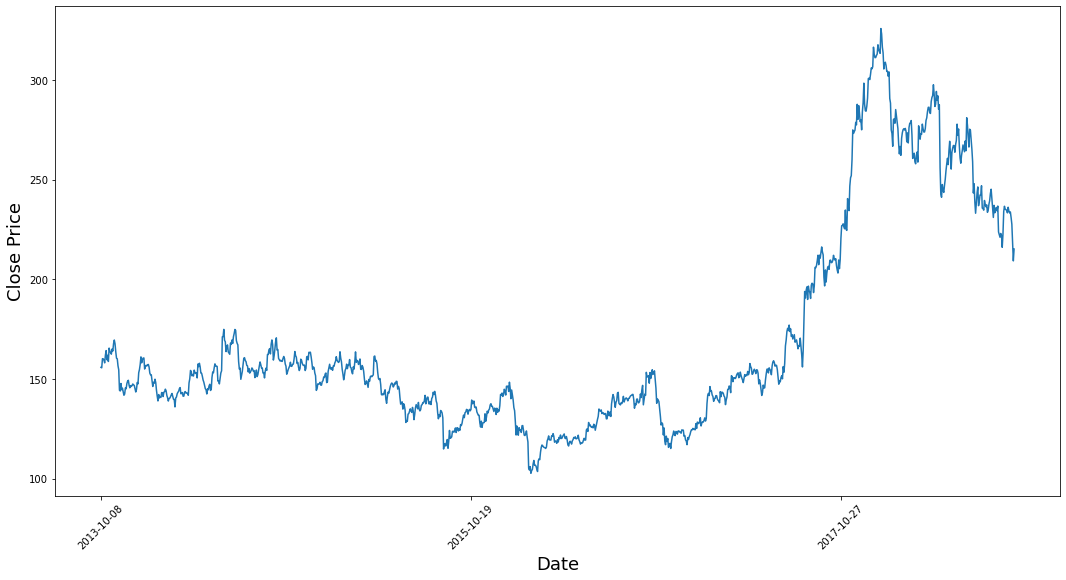

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Close']))
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN
from tensorflow.keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1), activation='relu'))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(SimpleRNN(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 75)            23100     
_________________________________________________________________
dropout (Dropout)            (None, 10, 75)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            25200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
gru (GRU)                    (None, 10, 50)            15300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 75)                9

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
15/15 [==============================] - 6s 35ms/step - loss: 0.0396
Epoch 2/200
15/15 [==============================] - 0s 33ms/step - loss: 0.0070
Epoch 3/200
15/15 [==============================] - 0s 31ms/step - loss: 0.0063
Epoch 4/200
15/15 [==============================] - 0s 32ms/step - loss: 0.0051
Epoch 5/200
15/15 [==============================] - 0s 31ms/step - loss: 0.0039
Epoch 6/200
15/15 [==============================] - 0s 32ms/step - loss: 0.0042
Epoch 7/200
15/15 [==============================] - 0s 33ms/step - loss: 0.0036
Epoch 8/200
15/15 [==============================] - 0s 33ms/step - loss: 0.0042
Epoch 9/200
15/15 [==============================] - 0s 33ms/step - loss: 0.0036
Epoch 10/200
15/15 [==============================] - 1s 35ms/step - loss: 0.0032
Epoch 11/200
15/15 [==============================] - 0s 32ms/step - loss: 0.0034
Epoch 12/200
15/15 [==============================] - 0s 32ms/step - loss: 0.0032
Epoch 13/200
15/15 [=====

In [ ]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

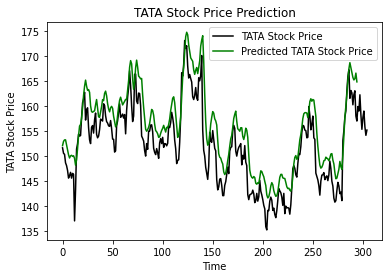

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()